# Plot with Points

In [1]:
import yfinance as yf

from mplchart.chart import Chart
from mplchart.primitives import Candlesticks
from mplchart.datamodels import ChartPoint

## Fetching the prices

In [2]:
ticker = "AAPL"
aapl = yf.Ticker(ticker).history(period="1y")
aapl

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-24 00:00:00-04:00,192.388283,193.880359,191.234407,191.731766,45377800,0.0,0.0
2023-07-25 00:00:00-04:00,192.308691,193.412828,191.900854,192.597153,37283200,0.0,0.0
2023-07-26 00:00:00-04:00,192.646902,194.606496,192.298760,193.472519,47471900,0.0,0.0
2023-07-27 00:00:00-04:00,194.984491,196.158250,191.532821,192.199280,47460200,0.0,0.0
2023-07-28 00:00:00-04:00,193.641611,195.591263,193.114412,194.795486,48291400,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-16 00:00:00-04:00,235.000000,236.270004,232.330002,234.820007,43234300,0.0,0.0
2024-07-17 00:00:00-04:00,229.449997,231.460007,226.639999,228.880005,57345900,0.0,0.0
2024-07-18 00:00:00-04:00,230.279999,230.440002,222.270004,224.179993,66034600,0.0,0.0


### With arrows and arrowprops

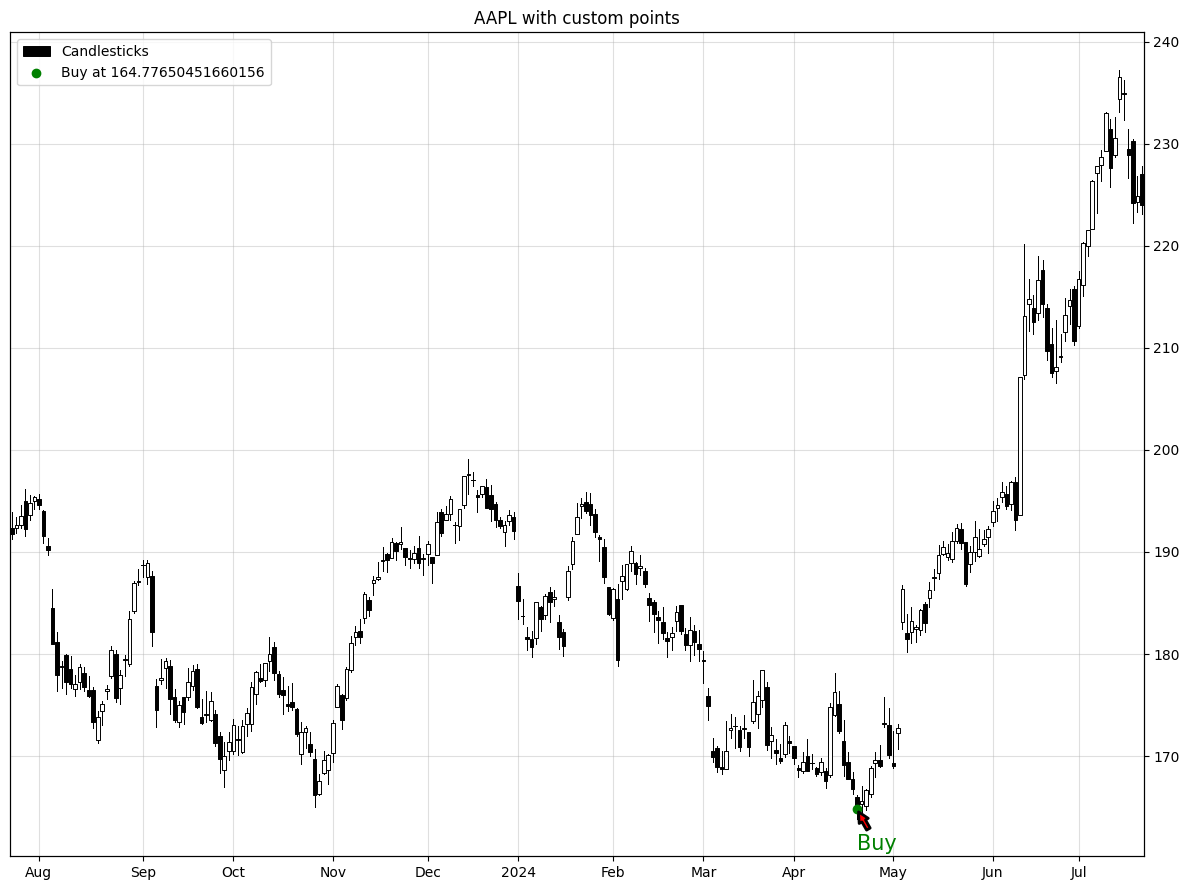

In [3]:
# Calculate a price via an algorithm ...

min_close_index = aapl['Close'].idxmin()
datetime_for_min_close = aapl.loc[min_close_index].name
price_for_min_close = aapl.loc[min_close_index, 'Close']

title = "AAPL with custom points"

indicators = [
    Candlesticks(),
]

chart_points = [
    ChartPoint(
        datetime=datetime_for_min_close,
        price=price_for_min_close,
        arrow=True,
        label="Buy",
        label_offset=-4,
        color="green",
        arrowprops={"facecolor":"red", "arrowstyle":"simple", "linewidth":2}
    )
]
chart = Chart(title=title)
chart.plot(aapl, indicators)
chart.plot_points(chart_points)

### Without arrows

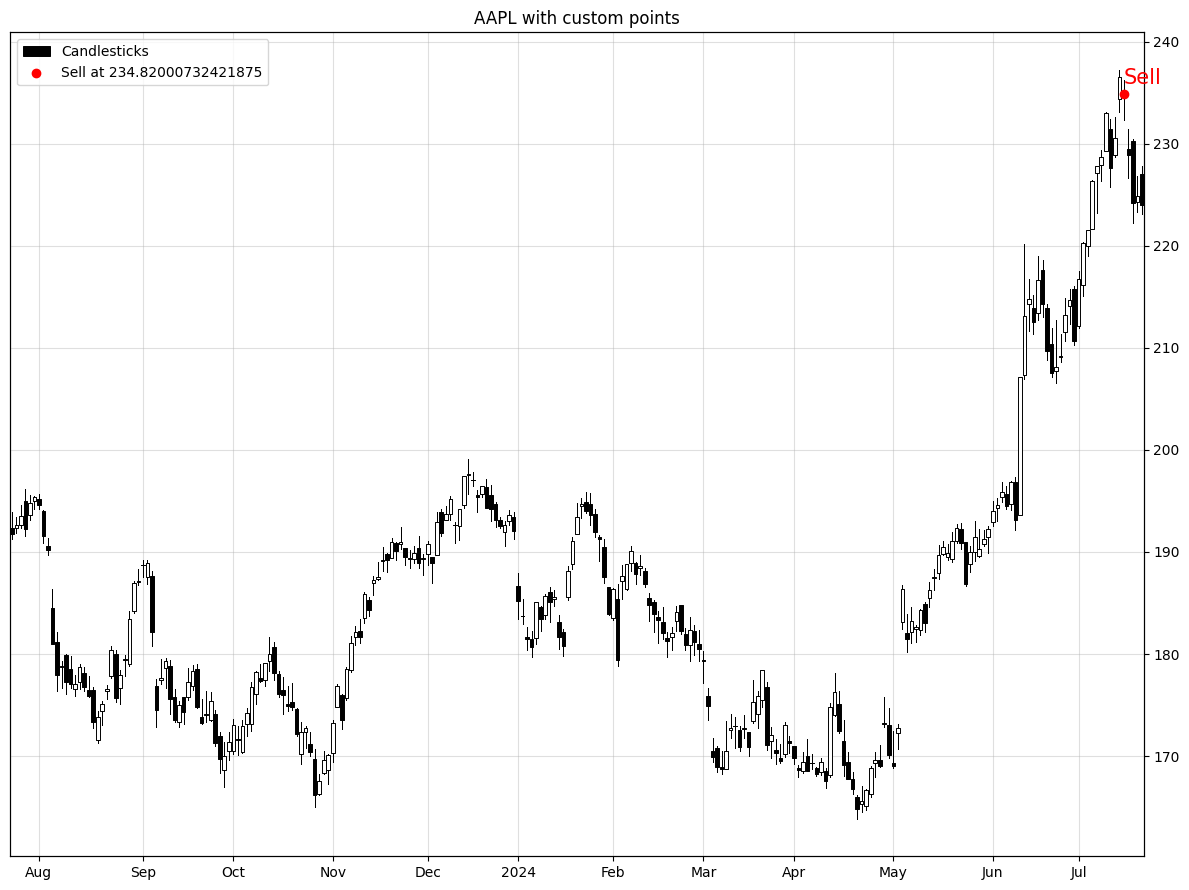

In [4]:
# Calculate a price via an algorithm ...

max_close_index = aapl['Close'].idxmax()
datetime_for_max_close = aapl.loc[max_close_index].name
price_for_max_close = aapl.loc[max_close_index, 'Close']

title = "AAPL with custom points"

indicators = [
    Candlesticks(),
]

chart_points = [
    ChartPoint(
        datetime=datetime_for_max_close,
        price=price_for_max_close,
        label="Sell",
        color="red",
    )
]
chart = Chart(title=title)
chart.plot(aapl, indicators)
chart.plot_points(chart_points)